In [1]:
import numpy as np
import pandas as pd
from statistics import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv("fatal-police-shootings-data.csv")


In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,02-01-2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,02-01-2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,03-01-2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,04-01-2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,04-01-2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129 entries, 0 to 6128
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6129 non-null   int64  
 1   name                     5908 non-null   object 
 2   date                     6129 non-null   object 
 3   manner_of_death          6129 non-null   object 
 4   armed                    5921 non-null   object 
 5   age                      5857 non-null   float64
 6   gender                   6128 non-null   object 
 7   race                     5510 non-null   object 
 8   city                     6129 non-null   object 
 9   state                    6129 non-null   object 
 10  signs_of_mental_illness  6129 non-null   bool   
 11  threat_level             6129 non-null   object 
 12  flee                     5772 non-null   object 
 13  body_camera              6129 non-null   bool   
 14  longitude               

In [5]:
df = df.drop(['name','id','longitude','latitude'],axis=1)

In [6]:
df

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact
0,02-01-2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,True
1,02-01-2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,True
2,03-01-2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,True
3,04-01-2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,True
4,04-01-2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6124,08-03-2021,shot,gun,NaN,M,NaN,Burbank,CA,False,other,NaN,False,True
6125,09-03-2021,shot,undetermined,NaN,M,NaN,Reedsport,OR,False,undetermined,Not fleeing,False,True
6126,09-03-2021,shot,gun,67.0,M,NaN,Minneola,KS,False,other,Car,False,True
6127,09-03-2021,shot,gun,NaN,M,NaN,Riverside,CA,False,other,Foot,False,True


In [7]:
df.isnull().sum()

date                         0
manner_of_death              0
armed                      208
age                        272
gender                       1
race                       619
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       357
body_camera                  0
is_geocoding_exact           0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
#SWEETVIZ Repot
import sweetviz as sv
dataset_report = sv.analyze(df)
dataset_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


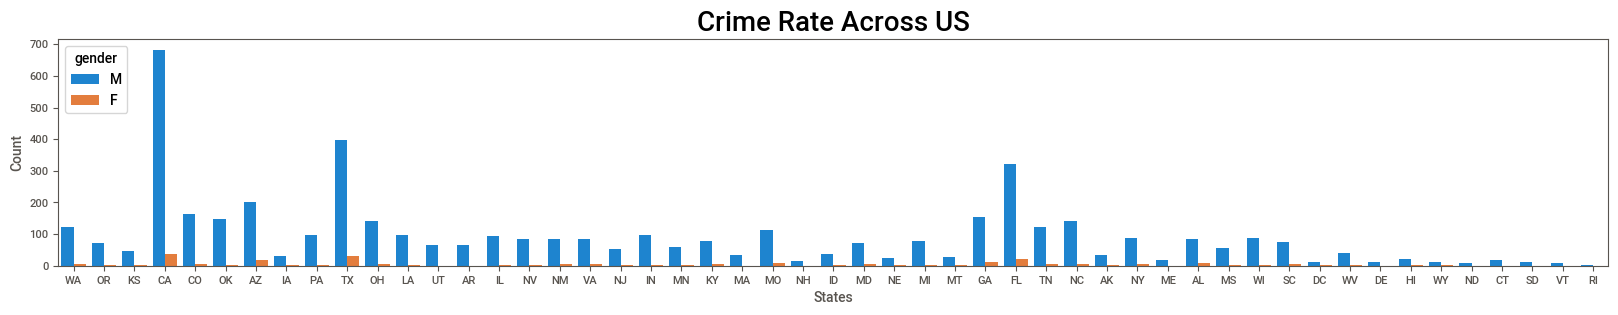

In [10]:
plt.figure(figsize=(20,3), facecolor='w')
sns.countplot(x='state',data=df,hue='gender')
plt.title('Crime Rate Across US', size=20)
plt.xlabel('States', size=10)
plt.ylabel('Count', size=10)
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

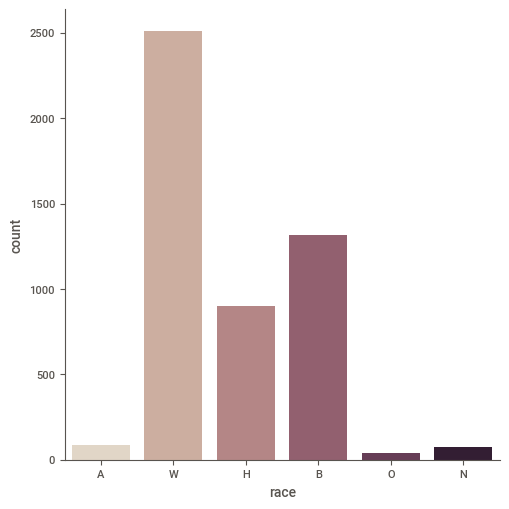

In [11]:
sns.catplot(x="race", kind="count", palette="ch:.25", data=df)

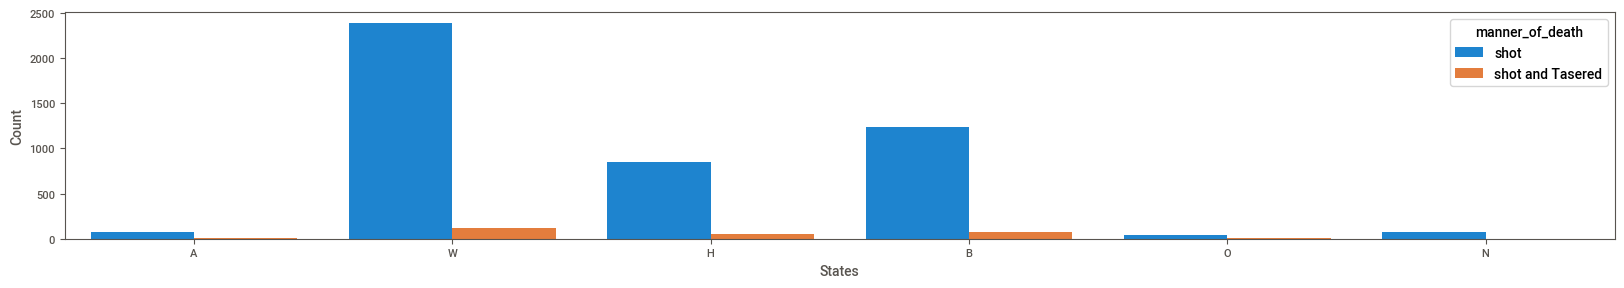

In [12]:
plt.figure(figsize=(20,3), facecolor='w')
sns.countplot(x='race',data=df,hue='manner_of_death')
plt.xlabel('States', size=10)
plt.ylabel('Count', size=10)
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

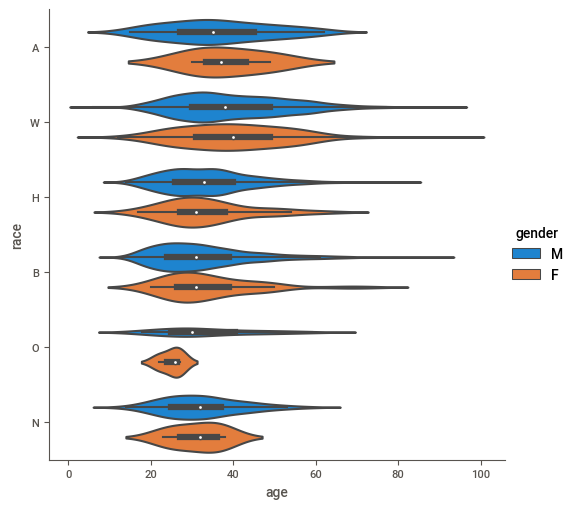

In [13]:
sns.catplot(x="age", y="race", hue="gender",kind="violin", data=df)

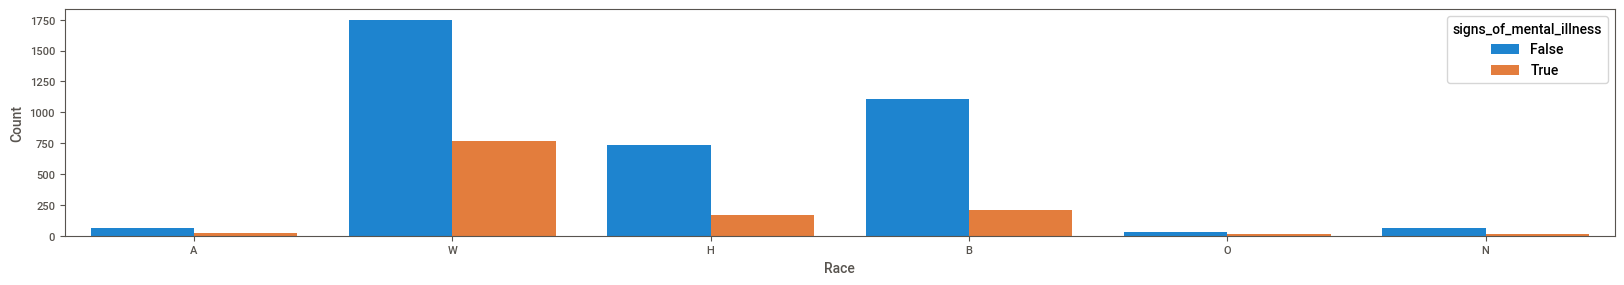

In [14]:
plt.figure(figsize=(20,3), facecolor='w')
sns.countplot(x='race',data=df,hue='signs_of_mental_illness')
plt.xlabel('Race', size=10)
plt.ylabel('Count', size=10)
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

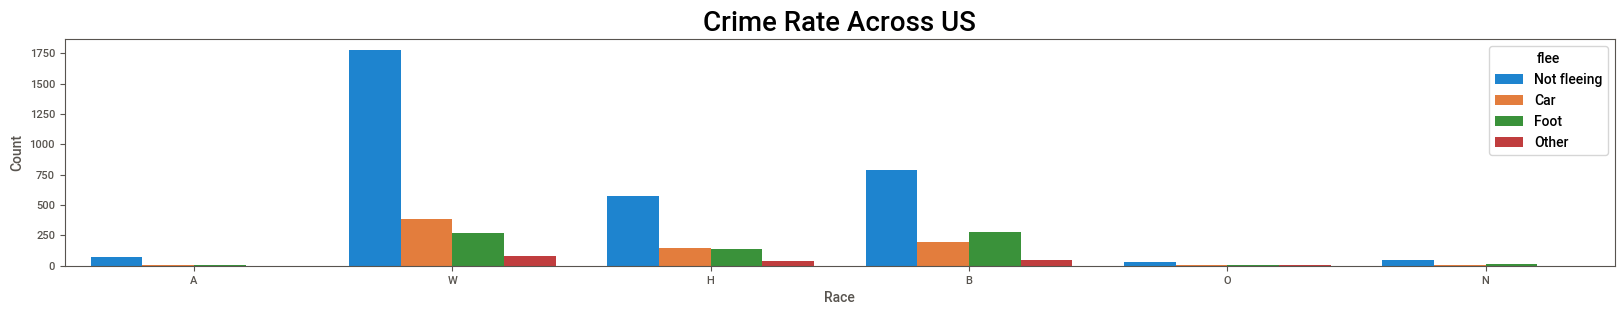

In [15]:
plt.figure(figsize=(20,3), facecolor='w')
sns.countplot(x='race',data=df,hue='flee')
plt.title('Crime Rate Across US', size=20)
plt.xlabel('Race', size=10)
plt.ylabel('Count', size=10)
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

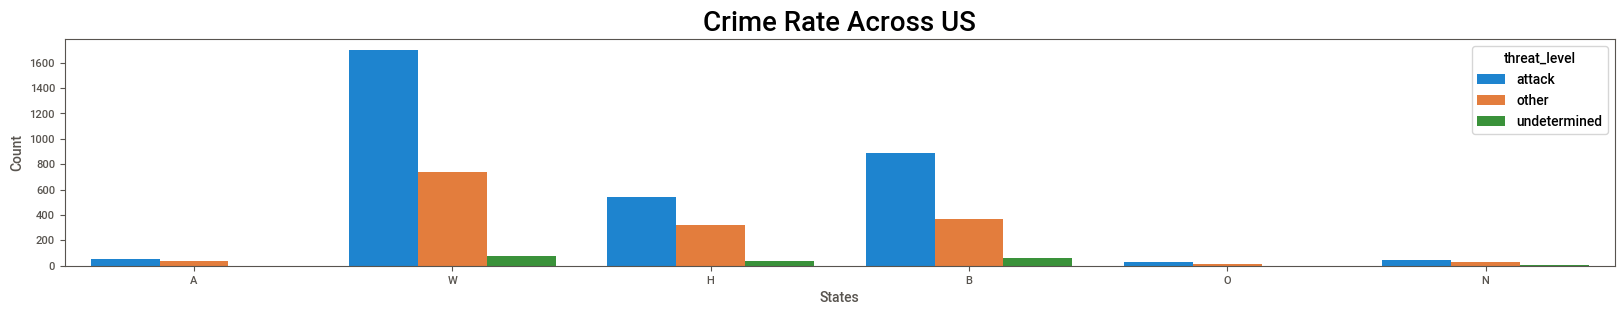

In [16]:
plt.figure(figsize=(20,3), facecolor='w')
sns.countplot(x='race',data=df,hue='threat_level')
plt.title('Crime Rate Across US', size=20)
plt.xlabel('States', size=10)
plt.ylabel('Count', size=10)
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

In [17]:
def ground_count(race,gender):
    group_df = df[(df.race == race) & (df.gender == gender)]
    ground_count = group_df.groupby(["armed","gender"])["gender"].count().head(5).sort_values(ascending=False)
    return print(ground_count)

In [18]:
ground_count("W","M")

armed               gender
Taser               M         11
BB gun              M          5
air conditioner     M          1
BB gun and vehicle  M          1
Airsoft pistol      M          1
Name: gender, dtype: int64


In [19]:
ground_count("W","F")

armed    gender
gun      F         78
knife    F         23
hatchet  F          2
hammer   F          1
ax       F          1
Name: gender, dtype: int64
